# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file = 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_orig, y_train_orig = train['features'], train['labels']
X_valid_orig, y_valid_orig = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
#Concatenating Training and validation data as the original validation data is less than 20% of training data
X_train = np.concatenate((X_train_orig,X_valid_orig))
y_train = np.concatenate((y_train_orig,y_valid_orig))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(39209, 32, 32, 3)
(39209,)
(12630, 32, 32, 3)
(12630,)


## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np
# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of testing examples.
n_test = len(y_test)

#n_valid = len(y_valid)

# TODO: What's the shape of an traffic sign image?
image_shape = image_shape = X_train.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

img_size=X_train.shape[1] #Size of input images

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (39209, 32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

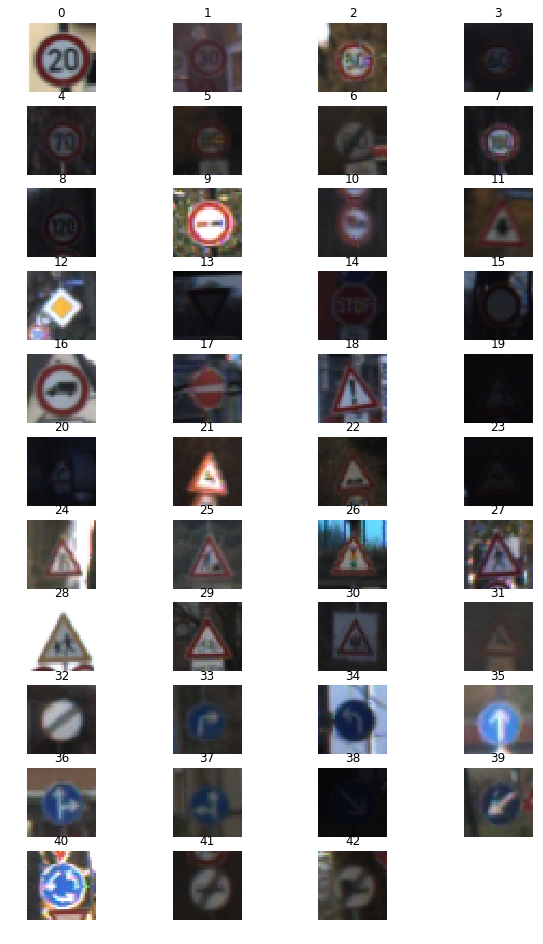

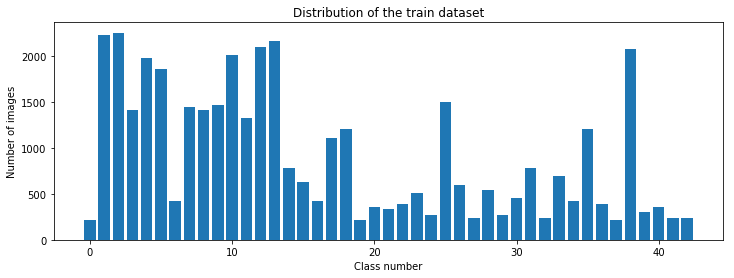

Min number of images per class = 210
Max number of images per class = 2250


In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
import matplotlib.pyplot as plt
%matplotlib inline
n_classes = len(np.unique(y_train))
num_of_samples=[]
plt.figure(figsize=(10, 16.5))
for i in range(0, n_classes):
    plt.subplot(11, 4, i+1)
    x_select = X_train[y_train == i]
    plt.imshow(x_select[0, :, :, :]) #draw the first image of each class
    plt.title(i)
    plt.axis('off')
    num_of_samples.append(len(x_select))
plt.show()

#Plot number of images per class
plt.figure(figsize=(12, 4))
plt.bar(range(0, n_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

print("Min number of images per class =", min(num_of_samples))
print("Max number of images per class =", max(num_of_samples))

## Mean Values of Training and Test Dataset before Normalization

In [4]:
print(np.mean(X_train))
print(np.mean(X_test))
#print(np.mean(X_valid))

82.7764356557
82.1484603612


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Normalize Training, Testing and Validation Datasets

In [5]:
import numpy as np
import cv2

# Convert to grayscale
X_train_rgb = X_train
X_train_gry = np.sum(X_train/3, axis=3, keepdims=True)

X_test_rgb = X_test
X_test_gry = np.sum(X_test/3, axis=3, keepdims=True)

X_train = X_train_gry
X_test = X_test_gry

#Normalize
X_train_norm = (X_train - 128)/128
X_test_norm = (X_test -128)/128

X_train = X_train_norm
X_test = X_test_norm

## Helper functions to augment data

In [6]:
def random_translate(img):
    """Applies translation up to px pixels in x and y directions"""
    rows,cols,_ = img.shape
    px = 2
    dx,dy = np.random.randint(-px,px,2)
    A = np.float32([[1,0,dx],[0,1,dy]])
    img_trns = cv2.warpAffine(img,A,(cols,rows))
    img_trns = img_trns[:,:,np.newaxis]
    return img_trns

def random_scale(img):
    """Scales image up to px pixels in x and y directions"""
    rows,cols,_ = img.shape
    # Pixel limits to transform
    px = np.random.randint(-2,2)
    # End Co-ordinates
    crds1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])
    # Starting Co-ordinates
    crds2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])
    P = cv2.getPerspectiveTransform(crds1,crds2)
    img_scl = cv2.warpPerspective(img,P,(rows,cols))
    img_scl = img_scl[:,:,np.newaxis]
    return img_scl

def gaussian_blur(img, kernel_size=3):
    """Applies a Gaussian Noise kernel"""
    img_smt = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
    img_smt = img_smt[:,:,np.newaxis]
    return img_smt

def random_rotate(img):
    """Rotates image up to ang degrees """
    c_x,c_y = int(img.shape[0]/2), int(img.shape[1]/2)
    ang = 30.0*np.random.rand()-15
    R = cv2.getRotationMatrix2D((c_x, c_y), ang, 1.0)
    img_rot = cv2.warpAffine(img, R, img.shape[:2])
    img_rot = img_rot[:,:,np.newaxis]
    return img_rot

def random_brightness(img):
    shifted = img + 1.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    img_brgt = shifted * coef - 1.0
    return img_brgt

def random_warp(img):
    rows,cols,_ = img.shape
    # random scaling coefficients
    rndx = np.random.rand(3) - 0.5
    rndx *= cols * 0.06   # this coefficient determines the degree of warping
    rndy = np.random.rand(3) - 0.5
    rndy *= rows * 0.06
    # 3 starting points for transform, 1/4 way from edges
    x1 = cols/4
    x2 = 3*cols/4
    y1 = rows/4
    y2 = 3*rows/4
    pts1 = np.float32([[y1,x1],
                       [y2,x1],
                       [y1,x2]])
    pts2 = np.float32([[y1+rndy[0],x1+rndx[0]],
                       [y2+rndy[1],x1+rndx[1]],
                       [y1+rndy[2],x2+rndx[2]]])
    M = cv2.getAffineTransform(pts1,pts2)
    img_warp = cv2.warpAffine(img,M,(cols,rows))
    img_warp = img_warp[:,:,np.newaxis]
    return img_warp

def augment_img(img):
    """Image augumentation pipeline """
    img=random_translate(img)
    img=random_scale(img)
    img=random_rotate(img)
    img=random_brightness(img)
    img=random_warp(img)
    img_aug=gaussian_blur(img)
    return img_aug




## Preprocess Data

Augument data and shuffle data

In [7]:
input_indices = []
output_indices = []

for class_n in range(n_classes):
    print(class_n, ': ', end='')
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    if n_samples < 1000:
        for i in range(1000 - n_samples):
            input_indices.append(class_indices[0][i%n_samples])
            output_indices.append(X_train.shape[0])
            new_img = X_train[class_indices[0][i % n_samples]]
            new_img = augment_img(new_img)
            X_train = np.concatenate((X_train, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
            if i % 50 == 0:
                print('|', end='')
            elif i % 10 == 0:
                print('-',end='')
    print('')
            
print('X, y shapes:', X_train.shape, y_train.shape)

0 : |----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|---
1 : 
2 : 
3 : 
4 : 
5 : 
6 : |----|----|----|----|----|----|----|----|----|----|----|--
7 : 
8 : 
9 : 
10 : 
11 : 
12 : 
13 : 
14 : |----|----|----|----|-
15 : |----|----|----|----|----|----|----|-
16 : |----|----|----|----|----|----|----|----|----|----|----|--
17 : 
18 : 
19 : |----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|---
20 : |----|----|----|----|----|----|----|----|----|----|----|----|---
21 : |----|----|----|----|----|----|----|----|----|----|----|----|----|-
22 : |----|----|----|----|----|----|----|----|----|----|----|----|
23 : |----|----|----|----|----|----|----|----|----|---
24 : |----|----|----|----|----|----|----|----|----|----|----|----|----|----|--
25 : 
26 : |----|----|----|----|----|----|----|----
27 : |----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
28 : |----|----|----|----|----|----|----|----|----|
29 : |----|----|----|----|-

## Shuffle the dataset and split into train,test and validation sets

In [9]:
## Shuffle the training dataset

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

print('done')

done


In [10]:
## Split validation dataset off from training dataset
print("Old X_train size:",len(X_train))
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
                                                                test_size=0.20, random_state=42)


print("New X_train size:",len(X_train))
print("X_validation size:",len(X_valid))

Old X_train size: 54710
New X_train size: 43768
X_validation size: 10942


## Save the data to disk for quick load and to avoid regenerating augmented data

In [11]:
aug_train = {'features': X_train,
             'labels': y_train}
aug_val = {'features': X_valid,
             'labels': y_valid}
aug_test = {'features': X_test,
             'labels': y_test}
pickle.dump(aug_train, open( "./my-augmented-data/aug_train1.p", "wb" ) )
pickle.dump(aug_val, open( "./my-augmented-data/aug_val1.p", "wb" ) )
pickle.dump(aug_test, open( "./my-augmented-data/aug_test1.p", "wb" ) )

print('done')

done


In [12]:
print(np.mean(X_train))
print(np.mean(X_test))
print(np.mean(X_valid))
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
print(y_train.shape)

-0.282008280784
-0.358215153428
-0.283820187786
(43768, 32, 32, 1)
(12630, 32, 32, 1)
(10942, 32, 32, 1)
(43768,)


## Visualize Data after preprocessing

View a sample from the pre processed dataset.

39


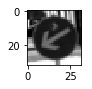

In [18]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image,cmap='gray')
print(y_train[index])

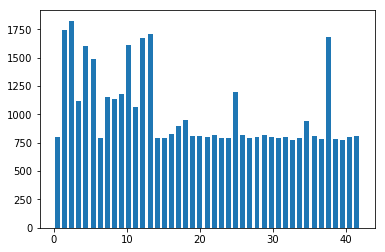

In [19]:
# histogram of label frequency
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

### Model Architecture

1. 5x5 convolution (32x32x1 in, 28x28x6 out)
2. ReLU
3. 2x2 max pool (28x28x6 in, 14x14x6 out)
4. 5x5 convolution (14x14x6 in, 10x10x16 out)
5. ReLU
6. 2x2 max pool (10x10x16 in, 5x5x16 out)
7. 5x5 convolution (5x5x6 in, 1x1x400 out)
8. ReLu
9. Flatten layers from numbers 8 (1x1x400 -> 400) and 6 (5x5x16 -> 400)
10. Concatenate flattened layers to a single size-800 layer
11. Dropout layer
12. Fully connected layer (800 in, 43 out)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [20]:
import tensorflow as tf

EPOCHS = 60
BATCH_SIZE = 96
keep_prob = tf.placeholder(tf.float32)

In [21]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    weights = {'wc1': tf.Variable(tf.random_normal([5, 5, 1, 6],mean=mu,stddev=sigma)),
               'wc2': tf.Variable(tf.random_normal([5, 5, 6, 16],mean=mu,stddev=sigma)),
               'wc3': tf.Variable(tf.random_normal([5, 5, 16, 400],mean=mu,stddev=sigma)),
               'wfc':tf.Variable(tf.random_normal([800,43],mean=mu,stddev=sigma)),
               }
    biases = {'bc1':tf.Variable(tf.zeros(6)),
              'bc2':tf.Variable(tf.zeros(16)),
              'bc3':tf.Variable(tf.zeros(400)),
              'bfc':tf.Variable(tf.zeros(43))}
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1 = tf.nn.conv2d(x,weights['wc1'],strides=[1,1,1,1],padding='VALID')+biases['bc1']

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)
    #conv1 = tf.nn.dropout(conv1,keep_prob)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    

    # TODO: Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16.
    conv2 = tf.nn.conv2d(conv1,weights['wc2'],strides=[1,1,1,1],padding='VALID')+biases['bc2']
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)
    #conv2 = tf.nn.dropout(conv2,keep_prob)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')  
    
    # TODO: Layer 3: Convolutional. Input = 5x5x16. Output = 1x1x400.
    conv3 = tf.nn.conv2d(conv2,weights['wc3'],strides=[1,1,1,1],padding='VALID')+biases['bc3']
    
    # TODO: Activation.
    conv3 = tf.nn.relu(conv3)
    
    # TODO: Flatten Layer2. Input = 5x5x16. Output = 400.
    conv2_flat = flatten(conv2)
    
    # TODO: Flatten Layer 3. Input = 1x1x400. Output = 400.
    conv3_flat = flatten(conv3)
    
    # Concat Flattened layer2 and Layer3 and . Input = 400 + 400. Output = 800
    concat_layer2_layer3 = tf.concat_v2([conv3_flat, conv2_flat], 1)
    
    # Dropout
    concat_layer2_layer3 = tf.nn.dropout(concat_layer2_layer3, keep_prob)
    

    # TODO: Layer 4: Fully Connected. Input = 800. Output = 43.
    logits = tf.add(tf.matmul(concat_layer2_layer3,weights['wfc']),biases['bfc'])
    
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [22]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [23]:
rate = 0.0009

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [24]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [25]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.837

EPOCH 2 ...
Validation Accuracy = 0.913

EPOCH 3 ...
Validation Accuracy = 0.940

EPOCH 4 ...
Validation Accuracy = 0.953

EPOCH 5 ...
Validation Accuracy = 0.961

EPOCH 6 ...
Validation Accuracy = 0.967

EPOCH 7 ...
Validation Accuracy = 0.971

EPOCH 8 ...
Validation Accuracy = 0.972

EPOCH 9 ...
Validation Accuracy = 0.975

EPOCH 10 ...
Validation Accuracy = 0.979

EPOCH 11 ...
Validation Accuracy = 0.978

EPOCH 12 ...
Validation Accuracy = 0.980

EPOCH 13 ...
Validation Accuracy = 0.981

EPOCH 14 ...
Validation Accuracy = 0.980

EPOCH 15 ...
Validation Accuracy = 0.982

EPOCH 16 ...
Validation Accuracy = 0.982

EPOCH 17 ...
Validation Accuracy = 0.983

EPOCH 18 ...
Validation Accuracy = 0.982

EPOCH 19 ...
Validation Accuracy = 0.984

EPOCH 20 ...
Validation Accuracy = 0.984

EPOCH 21 ...
Validation Accuracy = 0.984

EPOCH 22 ...
Validation Accuracy = 0.984

EPOCH 23 ...
Validation Accuracy = 0.985

EPOCH 24 ...
Validation Accura

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [26]:

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.951


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.## Now Test the model on some new images from web

In [27]:
# Reinitialize and re-import if starting a new kernel here
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import numpy as np
import cv2


### Load and Output the Images

0
1
2
3
4
5
6
7
(8, 32, 32, 1)


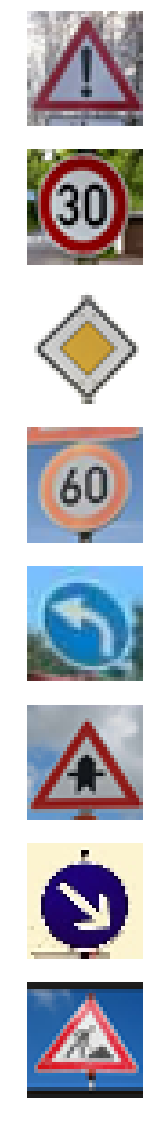

In [28]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#reading in an image
import glob
import matplotlib.image as mpimg

fig, axs = plt.subplots(8,1, figsize=(40, 20))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

my_images = []

for i, img in enumerate(glob.glob('./new_images/*.png')):
    image = cv2.imread(img)
    print(i)
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    my_images.append(image)

my_images = np.asarray(my_images)

my_images_gry = np.sum(my_images/3, axis=3, keepdims=True)

my_images_normalized = (my_images_gry-128)/128 

print(my_images_normalized.shape)

### Predict the Sign Type for Each Image

In [29]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

my_labels = [18, 1, 12, 3, 34, 11, 38, 25]


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    #saver3.restore(sess, "./lenet")
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_accuracy = evaluate(my_images_normalized, my_labels)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

Test Set Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

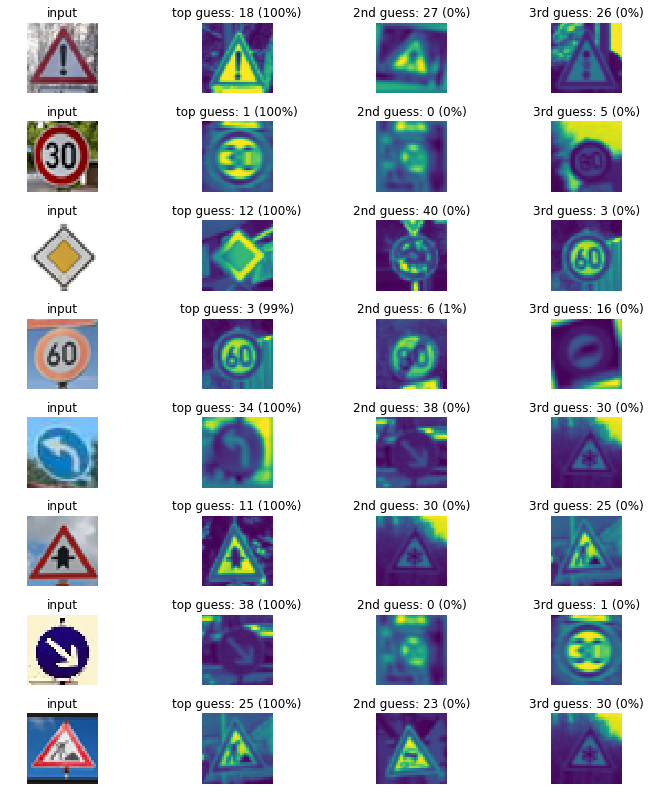

In [30]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_images_normalized, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: my_images_normalized, keep_prob: 1.0})

    
    fig, axs = plt.subplots(len(my_images),4, figsize=(12, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()

    for i, image in enumerate(my_images):
        axs[4*i].axis('off')
        axs[4*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[4*i].set_title('input')
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_valid == guess1)[0]
        axs[4*i+1].axis('off')
        axs[4*i+1].imshow(X_valid[index1].squeeze())
        axs[4*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_valid == guess2)[0]
        axs[4*i+2].axis('off')
        axs[4*i+2].imshow(X_valid[index2].squeeze())
        axs[4*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*my_top_k[0][i][1]))
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_valid == guess3)[0]
        axs[4*i+3].axis('off')
        axs[4*i+3].imshow(X_valid[index3].squeeze())
        axs[4*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][2]))

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

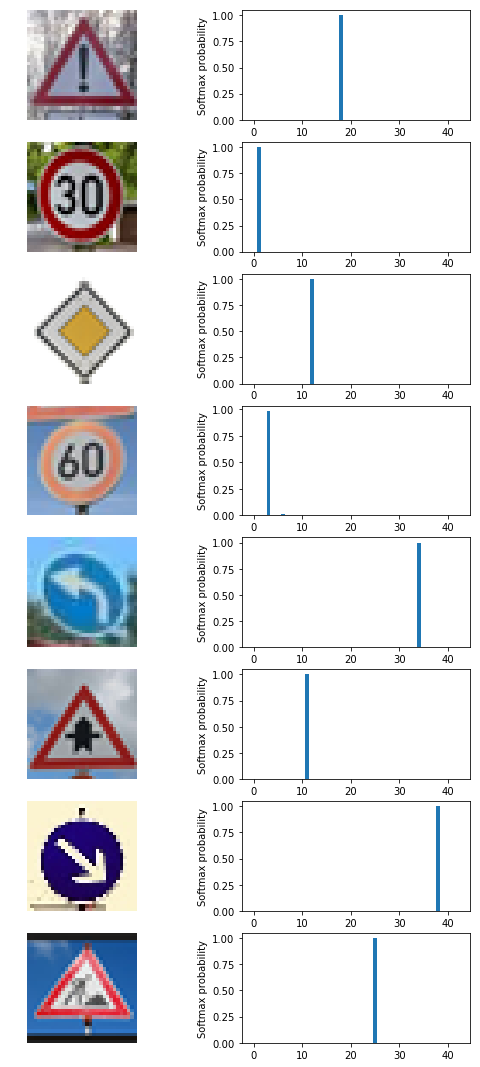

In [31]:
fig, axs = plt.subplots(8,2, figsize=(9, 19))
axs = axs.ravel()

for i in range(len(my_softmax_logits)*2):
    if i%2 == 0:
        axs[i].axis('off')
        axs[i].imshow(cv2.cvtColor(my_images[i//2], cv2.COLOR_BGR2RGB))
    else:
        axs[i].bar(np.arange(n_classes), my_softmax_logits[(i-1)//2]) 
        axs[i].set_ylabel('Softmax probability')

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")